In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

from sklearn.decomposition import FastICA

# ICA

## Zad.

Wygeneruj dwa sygnały.

In [2]:
# #############################################################################
# Generate sample data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(20 * time)  # Signal 1 : sinusoidal signal
s2 = signal.sawtooth(2 * np.pi * time)  # Signal 2 : square signal

S = np.c_[s1, s2]

<Figure size 432x288 with 0 Axes>

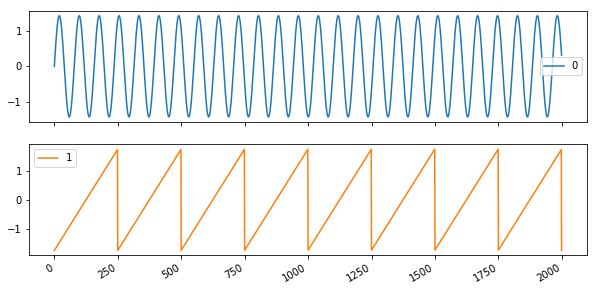

In [3]:
S /= S.std(axis=0)  # Standardize data

plt.figure()
df = pd.DataFrame(S)
df.plot(subplots=True, figsize=(10, 5));
plt.show()

# Zad 

dokonaj mieszania sygnałów.

In [4]:
# Mix data
A = np.array([[1, -0.7], [0.5, 2]])  # Mixing matrix
A

array([[ 1. , -0.7],
       [ 0.5,  2. ]])

# Zad
Narysuj sygnały po odmieszaniu.

<Figure size 432x288 with 0 Axes>

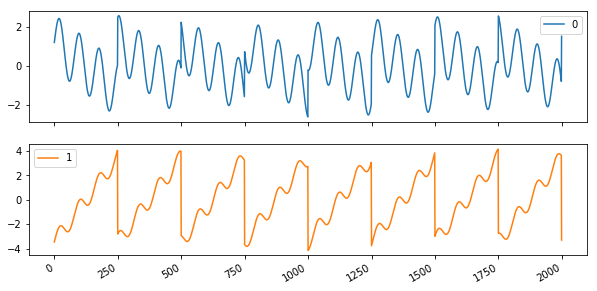

In [5]:
X = np.dot(S, A.T)  # Generate observations

plt.figure()
df = pd.DataFrame(X)
df.plot(subplots=True, figsize=(10, 5));
plt.show()

In [6]:
# Compute ICA
ica = FastICA(n_components=2)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix
A_

array([[-31.33906679,  44.86344916],
       [ 89.42457878,  21.95466495]])

# Zad.
 * wygeneruj dwa sygnały 
 * dokonaj mieszania
 * wykonaj algorytm FastICA
 * narysuj:
     
     * sygnały oryginalne
     * sygnały po zmieniszani
     * sygnały po odmieszaniu
 

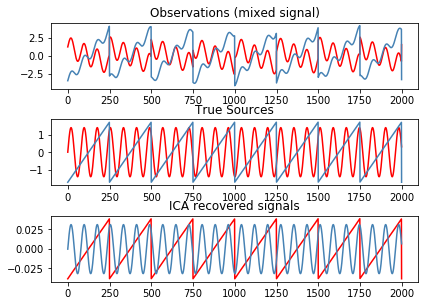

In [7]:
# #############################################################################
# Plot results

plt.figure()

models = [X, S, S_]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(3, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.show()

# Zad.
 * wygeneruj trzech sygnały z szumem
 * dokonaj mieszania
 * wykonaj algorytm FastICA
 * narysuj:
     
     * sygnały oryginalne
     * sygnały po zmieniszani
     * sygnały po odmieszaniu
 

In [8]:
# #############################################################################
# Generate sample data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal


S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise


<Figure size 432x288 with 0 Axes>

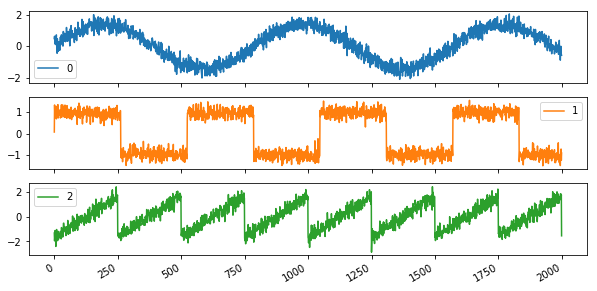

In [9]:
S /= S.std(axis=0)  # Standardize data

plt.figure()
df = pd.DataFrame(S)
df.plot(subplots=True, figsize=(10, 5));
plt.show()

In [18]:
# Mix data
A = np.array([[1, -0.7, 0.2], [0.5, 0.2, -0.3], [0.4, 0.2, 0.3]])  # Mixing matrix
A

array([[ 1. , -0.7,  0.2],
       [ 0.5,  0.2, -0.3],
       [ 0.4,  0.2,  0.3]])

<Figure size 432x288 with 0 Axes>

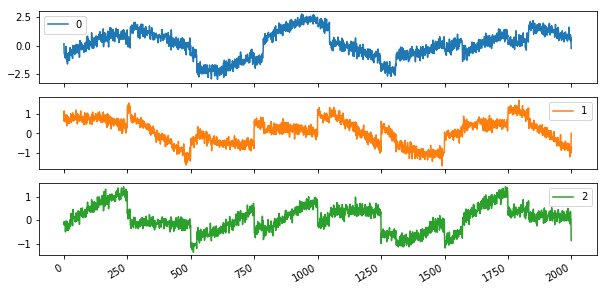

In [19]:
X = np.dot(S, A.T)  # Generate observations

plt.figure()
df = pd.DataFrame(X)
df.plot(subplots=True, figsize=(10, 5));
plt.show()

In [21]:
# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix
A_

array([[-11.73603574,  43.29945514,  28.96580885],
       [ 12.41135981,  23.38715129, -10.95528491],
       [-14.10535872,  17.12243151,  -9.40301685]])

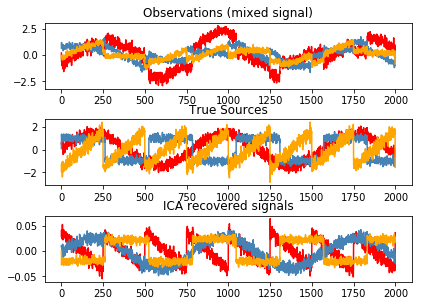

In [22]:
# #############################################################################
# Plot results

plt.figure()

models = [X, S, S_]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(3, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.show()